In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# just do gb1
ss_df = pd.read_csv('results/simulations/DE-active/scale2max/GB1-single_step_DE.csv')
recomb_df = pd.read_csv("results/simulations/DE-active/scale2max/GB1-recomb_SSM.csv")

In [4]:
mlde_all = pd.read_csv("results/mlde/vis_2/all_df.csv")
mlde_df = mlde_all[(mlde_all["lib"] == "GB1") & (mlde_all["n_mut_cutoff"] == "all") & (mlde_all["zs"]== "none") & (mlde_all["encoding"] == "one-hot")]

In [7]:
from SSMuLA.util import ecdf_transform

In [8]:
mlde_df["final_fitness"] = mlde_df["top_maxes"].values.copy()
mlde_df["final_fitness ECDF"] = ecdf_transform(mlde_df["top_maxes"])

/tmp/ipykernel_2940557/2423847029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlde_df["final_fitness"] = mlde_df["top_maxes"].values.copy()
/tmp/ipykernel_2940557/2423847029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlde_df["final_fitness ECDF"] = ecdf_transform(mlde_df["top_maxes"])


In [9]:
mlde_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,final_fitness,final_fitness ECDF
518600,one-hot,boosting,384,149361,0,0.337172,0.006653,0.627128,0.122141,0.770298,0.416548,0.0,10197.0,all,GB1,none,384,0.627128,0.341429
518601,one-hot,boosting,384,149361,1,0.313149,0.005628,0.831130,0.100569,0.785195,0.448754,0.0,23235.0,all,GB1,none,384,0.831130,0.739286
518602,one-hot,boosting,384,149361,2,0.367535,0.005830,0.629503,0.129742,0.785543,0.451986,0.0,36245.0,all,GB1,none,384,0.629503,0.365000
518603,one-hot,boosting,384,149361,3,0.497862,0.008681,0.716157,0.055017,0.765613,0.468036,0.0,30436.0,all,GB1,none,384,0.716157,0.548571
518604,one-hot,boosting,384,149361,4,0.465515,0.007334,0.689827,0.065948,0.768410,0.482155,0.0,36890.0,all,GB1,none,384,0.689827,0.505714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519995,one-hot,ridge,576,149361,45,0.136799,0.009462,0.784978,0.380986,0.847032,0.445571,0.0,4426.0,all,GB1,none,96,0.784978,0.694286
519996,one-hot,ridge,576,149361,46,0.175067,0.012426,0.784978,0.243581,0.833909,0.429427,0.0,843.0,all,GB1,none,96,0.784978,0.695000
519997,one-hot,ridge,576,149361,47,0.136367,0.007313,0.784978,0.279715,0.816702,0.423117,0.0,11145.0,all,GB1,none,96,0.784978,0.695714
519998,one-hot,ridge,576,149361,48,0.135847,0.008026,0.473378,0.179254,0.809781,0.505576,0.0,23890.0,all,GB1,none,96,0.473378,0.066429


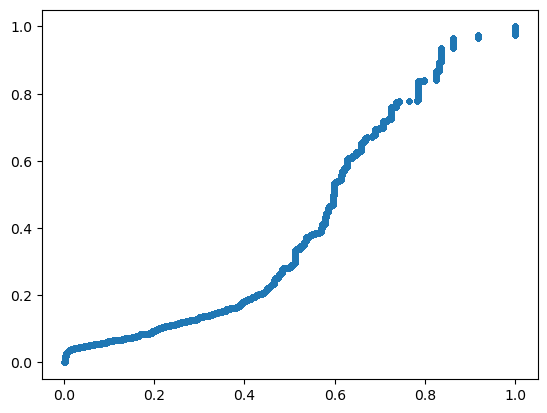

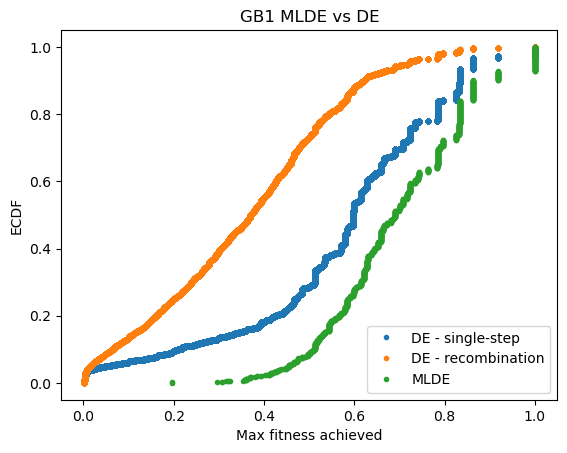

In [17]:
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step")
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination")
plt.plot(mlde_df["final_fitness"], mlde_df["final_fitness ECDF"], ".", label = "MLDE")
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [18]:
from SSMuLA.landscape_global import hamming

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
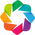

In [35]:

import holoviews as hv
from holoviews import dim


from SSMuLA.aa_global import ALL_AAS, ALL_AA_STR
from SSMuLA.landscape_global import (
    LIB_INFO_DICT,
    LIB_NAMES,
    TrpB_names,
    n_mut_cutoff_dict,
    make_new_sequence,
    hamming,
)
from SSMuLA.vis import (
    save_bokeh_hv,
    JSON_THEME,
    LIB_COLORS,
    one_decimal_x,
    one_decimal_y,
    fixmargins,
)
from SSMuLA.util import checkNgen_folder, get_file_name, ecdf_transform


hv.extension("bokeh")
hv.renderer("bokeh").theme = JSON_THEME



In [ ]:

def de_ecdf(
    slice_df: pd.DataFrame,
    lib_name: str,
    plot_name: str,
    plot_folder: str,
    skippng: bool = False,
):

    """
    A function to plot an ECDF of the DE simulation results

    Args:
    - slice_df: pd.DataFrame, A dataframe containing the DE simulation results
    - lib_name: str, The name of the library to plot
    - plot_name: str, The name of the plot
    - plot_folder: str, The folder to save the plot
    - skippng: bool, Skip plotting GB1 and TrpB
    """

    print("Plotting DE max fitness achieved ECDF...")

    # Initialize an empty HoloViews Overlay container
    overlay = hv.Overlay()

    
    # Initialize a dictionary to store legend labels
    legend_labels = {}

    # Iterate over simulation types and libraries, create individual traces, and overlay them
    for sim, style in DE_LINE_STYLES.items():
        # for lib_name, lib_color in LIB_COLORS.items():
        selection = slice_df[
            (slice_df["simulation"] == sim) & (slice_df["lib"] == lib_name)
        ]
        if not selection.empty:
            curve = hv.Curve(
                selection.sort_values(
                    ["simulation", "lib", "final_fitness", "final_fitness ECDF"]
                ),
                kdims="final_fitness",
                vdims=["final_fitness ECDF", "lib", "simulation"],
            )
            overlay *= curve.opts(
                line_dash=style,
                color=LIB_COLORS[lib_name],
                width=500,
                height=300,
                title=plot_name,
                hooks=[fixmargins, one_decimal_x, one_decimal_y],
                xlabel="Max fitness achieved",
                ylabel="ECDF",
            )
            legend_labels[sim] = hv.Curve([0], label=sim).opts(
                line_dash=style, color=LIB_COLORS[lib_name]
            )

    layout = overlay.opts(
        title=f"{lib_name} max fitness achieved no imputed",
        hooks=[fixmargins, one_decimal_x, one_decimal_y],
        xlabel="Max fitness achieved",
        ylabel="ECDF",
    )

    if skippng:
        skippng = lib_name == "GB1" or lib_name == "TrpB"
    else:
        skippng = False

    # Add the legend to the layout
    save_bokeh_hv(
        layout
        * hv.NdOverlay(legend_labels).opts(
            legend_position="right", legend_offset=(10, 100), legend_limit=50
        ),
        plot_name=plot_name,
        plot_path=checkNgen_folder(os.path.join(plot_folder, "ecdf")),
        bokehorhv="hv",
        dpi=300,
        scale=2,
        skippng=skippng,
    )
